# **Exploratory Data Analysis**

#### **Importing Libraries and Dataset**

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [43]:
import os

mock_dataset_source_path: str = os.path.abspath("../data/mock/mock_dataset.csv")

dataframe: pd.DataFrame = pd.read_csv(mock_dataset_source_path)

#### **Data Exploration**

In [44]:
dataframe.info()

num_of_rows: int = dataframe.shape[0]
num_of_cols: int = dataframe.shape[1]
print(f"\nNumber of Rows: {num_of_rows}\nNumber of Columns: {num_of_cols}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5586 entries, 0 to 5585
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         5586 non-null   object
 1   Message          5586 non-null   object
 2   Sent_Date        5586 non-null   object
 3   Sent_Time        5586 non-null   object
 4   Source_IP        5586 non-null   object
 5   Source_Location  5586 non-null   object
dtypes: object(6)
memory usage: 262.0+ KB

Number of Rows: 5586
Number of Columns: 6


In [45]:
dataframe.describe()

,Category,Message,Sent_Date,Sent_Time,Source_IP,Source_Location
count,5586,5586,5586,5586,5586,5586
unique,2,5157,92,5045,4757,10
top,ham,"Sorry, I'll call later",2025-09-28,00:04:42,203.0.113.94,"('Malaysia', 'Kuala Lumpur')"
freq,4825,30,81,4,10,929


In [46]:
display(dataframe.head())

,Category,Message,Sent_Date,Sent_Time,Source_IP,Source_Location
0,ham,"Go until jurong point, crazy.. Available only ...",2025-07-14,03:33:12,192.168.212.212,"('Malaysia', 'Kuala Lumpur')"
1,ham,Ok lar... Joking wif u oni...,2025-08-06,01:57:26,124.13.5.80,"('Hong Kong', 'Hong Kong')"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,2025-07-15,16:06:08,185.220.100.133,"('Romania', 'Bucharest')"
3,ham,U dun say so early hor... U c already then say...,2025-07-15,02:39:26,172.16.242.113,"('Indonesia', 'DKI Jakarta')"
4,ham,"Nah I don't think he goes to usf, he lives aro...",2025-09-01,04:41:55,10.0.236.99,"('Singapore', 'Central')"


**Count plot of Category**

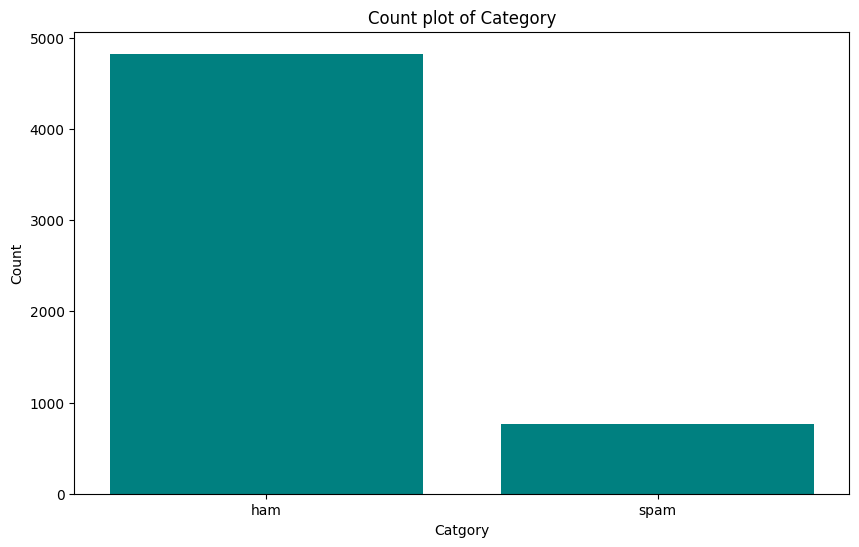

Category
ham     4825
spam     761
Name: count, dtype: int64

In [47]:
category_counts = dataframe["Category"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts, color="teal")
plt.title("Count plot of Category")
plt.xlabel("Catgory")
plt.ylabel("Count")
plt.show()

category_counts

**Count plot of Source Location**

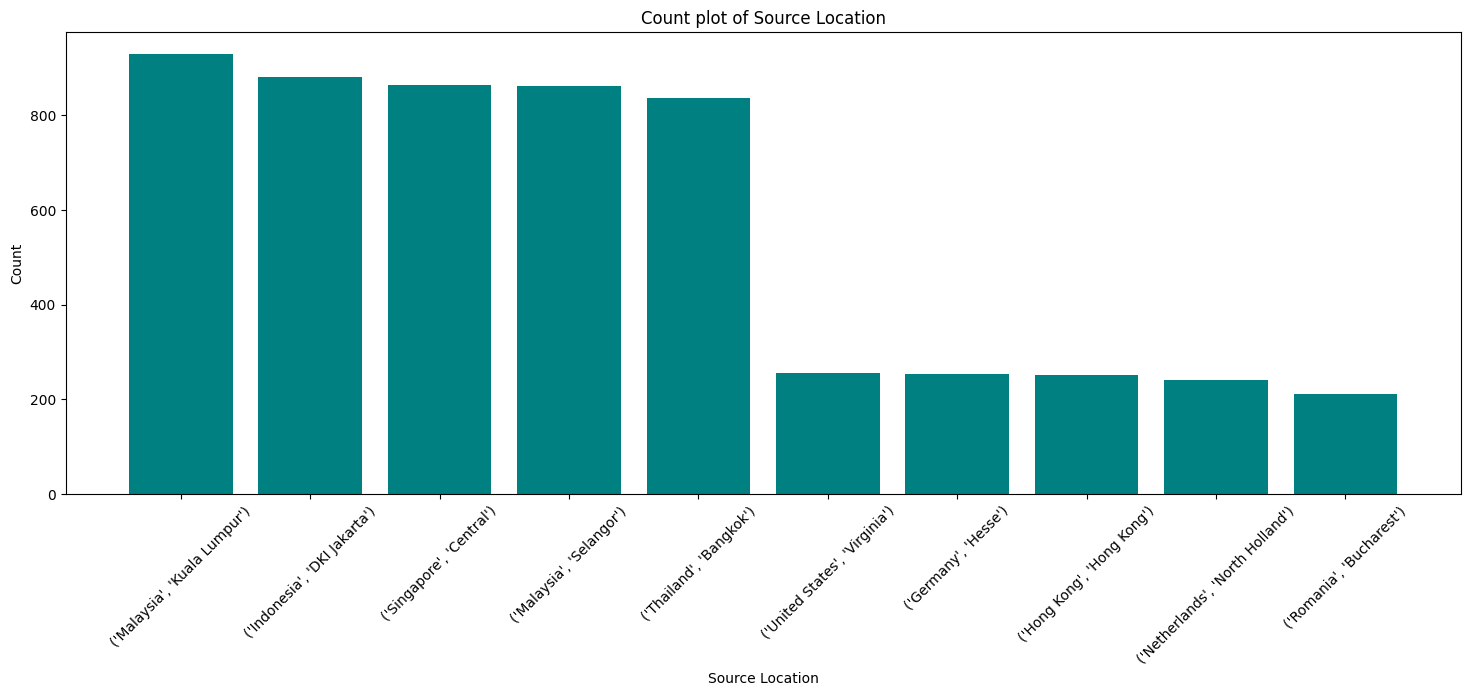

Source_Location
('Malaysia', 'Kuala Lumpur')        929
('Indonesia', 'DKI Jakarta')        881
('Singapore', 'Central')            864
('Malaysia', 'Selangor')            861
('Thailand', 'Bangkok')             837
('United States', 'Virginia')       255
('Germany', 'Hesse')                254
('Hong Kong', 'Hong Kong')          252
('Netherlands', 'North Holland')    241
('Romania', 'Bucharest')            212
Name: count, dtype: int64

In [48]:
source_location_counts = dataframe["Source_Location"].value_counts()

plt.figure(figsize=(18, 6))
plt.bar(source_location_counts.index, source_location_counts, color="teal")
plt.title("Count plot of Source Location")
plt.xticks(rotation=45)
plt.xlabel("Source Location")
plt.ylabel("Count")
plt.show()

source_location_counts

**Count plot of Source Location where Category is Spam**

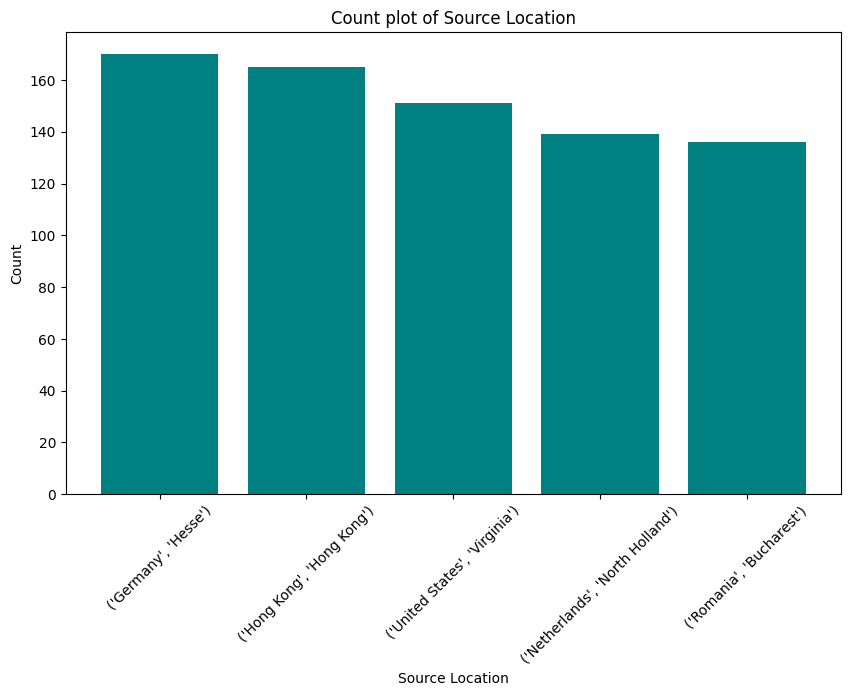

Source_Location
('Germany', 'Hesse')                170
('Hong Kong', 'Hong Kong')          165
('United States', 'Virginia')       151
('Netherlands', 'North Holland')    139
('Romania', 'Bucharest')            136
Name: count, dtype: int64

In [49]:
source_location_counts = dataframe[dataframe["Category"] == "spam"]["Source_Location"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(source_location_counts.index, source_location_counts, color="teal")
plt.title("Count plot of Source Location")
plt.xticks(rotation=45)
plt.xlabel("Source Location")
plt.ylabel("Count")
plt.show()

source_location_counts

**Count plot of Source Location where Category is Ham**

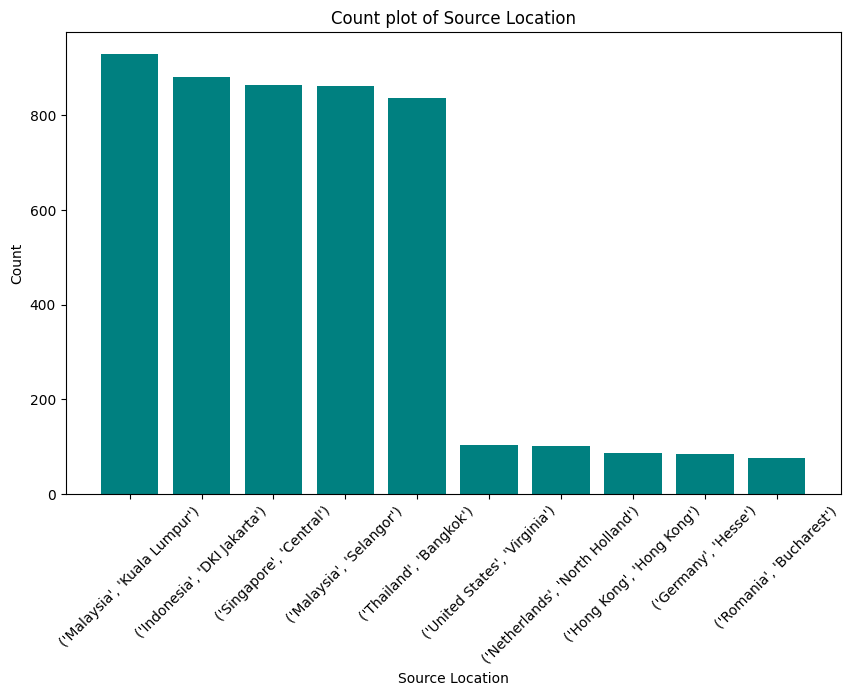

Source_Location
('Malaysia', 'Kuala Lumpur')        929
('Indonesia', 'DKI Jakarta')        881
('Singapore', 'Central')            864
('Malaysia', 'Selangor')            861
('Thailand', 'Bangkok')             837
('United States', 'Virginia')       104
('Netherlands', 'North Holland')    102
('Hong Kong', 'Hong Kong')           87
('Germany', 'Hesse')                 84
('Romania', 'Bucharest')             76
Name: count, dtype: int64

In [50]:
source_location_counts = dataframe[dataframe["Category"] == "ham"]["Source_Location"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(source_location_counts.index, source_location_counts, color="teal")
plt.title("Count plot of Source Location")
plt.xticks(rotation=45)
plt.xlabel("Source Location")
plt.ylabel("Count")
plt.show()

source_location_counts

**Exploration of Datetime**

In [67]:
def retrieve_time(time_object: str) -> tuple:
    hour, minute, second = time_object.split(':')

    return (int(hour), int(minute), int(second))

In [51]:
dataframe[["Sent_Date", "Sent_Time"]]

,Sent_Date,Sent_Time
0,2025-07-14,03:33:12
1,2025-08-06,01:57:26
2,2025-07-15,16:06:08
3,2025-07-15,02:39:26
4,2025-09-01,04:41:55
...,...,...
5581,2025-09-10,15:35:21
5582,2025-09-20,11:03:59
5583,2025-08-04,10:26:25
5584,2025-09-30,14:08:20


In [ ]:
datetime_object: pd.Series = dataframe["Sent_Date"].astype(str) + " " + dataframe["Sent_Time"].astype(str)

dataframe["Datetime_Stamp"] = pd.to_datetime(datetime_object, format="%Y-%m-%d %H:%M:%S")

display(dataframe.head())

,Category,Message,Sent_Date,Sent_Time,Source_IP,Source_Location,Datetime_Stamp
0,ham,"Go until jurong point, crazy.. Available only ...",2025-07-14,03:33:12,192.168.212.212,"('Malaysia', 'Kuala Lumpur')",2025-07-14 03:33:12
1,ham,Ok lar... Joking wif u oni...,2025-08-06,01:57:26,124.13.5.80,"('Hong Kong', 'Hong Kong')",2025-08-06 01:57:26
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,2025-07-15,16:06:08,185.220.100.133,"('Romania', 'Bucharest')",2025-07-15 16:06:08
3,ham,U dun say so early hor... U c already then say...,2025-07-15,02:39:26,172.16.242.113,"('Indonesia', 'DKI Jakarta')",2025-07-15 02:39:26
4,ham,"Nah I don't think he goes to usf, he lives aro...",2025-09-01,04:41:55,10.0.236.99,"('Singapore', 'Central')",2025-09-01 04:41:55


In [60]:
print(f"First Datetime Stamp: {min(dataframe["Datetime_Stamp"])}")
print(f"Final Datetime Stamp: {max(dataframe["Datetime_Stamp"])}")

First Datetime Stamp: 2025-07-01 00:09:34
Final Datetime Stamp: 2025-09-30 17:35:13


In [61]:
spam_dataframe: pd.DataFrame = dataframe[dataframe["Category"] == "spam"]
ham_dataframe: pd.DataFrame = dataframe[dataframe["Category"] == "ham"]

In [63]:
display(spam_dataframe.head())

,Category,Message,Sent_Date,Sent_Time,Source_IP,Source_Location,Datetime_Stamp
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,2025-07-15,16:06:08,185.220.100.133,"('Romania', 'Bucharest')",2025-07-15 16:06:08
5,spam,FreeMsg Hey there darling it's been 3 week's n...,2025-08-26,14:35:14,198.51.100.202,"('Germany', 'Hesse')",2025-08-26 14:35:14
8,spam,WINNER!! As a valued network customer you have...,2025-07-01,10:33:29,37.120.179.33,"('Romania', 'Bucharest')",2025-07-01 10:33:29
9,spam,Had your mobile 11 months or more? U R entitle...,2025-08-03,09:05:58,37.120.31.223,"('Romania', 'Bucharest')",2025-08-03 09:05:58
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",2025-07-28,10:23:47,45.67.98.164,"('Romania', 'Bucharest')",2025-07-28 10:23:47


In [64]:
display(ham_dataframe.head())

,Category,Message,Sent_Date,Sent_Time,Source_IP,Source_Location,Datetime_Stamp
0,ham,"Go until jurong point, crazy.. Available only ...",2025-07-14,03:33:12,192.168.212.212,"('Malaysia', 'Kuala Lumpur')",2025-07-14 03:33:12
1,ham,Ok lar... Joking wif u oni...,2025-08-06,01:57:26,124.13.5.80,"('Hong Kong', 'Hong Kong')",2025-08-06 01:57:26
3,ham,U dun say so early hor... U c already then say...,2025-07-15,02:39:26,172.16.242.113,"('Indonesia', 'DKI Jakarta')",2025-07-15 02:39:26
4,ham,"Nah I don't think he goes to usf, he lives aro...",2025-09-01,04:41:55,10.0.236.99,"('Singapore', 'Central')",2025-09-01 04:41:55
6,ham,Even my brother is not like to speak with me. ...,2025-09-22,00:20:33,124.13.213.168,"('Malaysia', 'Selangor')",2025-09-22 00:20:33


In [ ]:
from datetime import time

min_ham_time: time = time(*retrieve_time(min(ham_dataframe["Sent_Time"])))
max_ham_time: time = time(*retrieve_time(max(ham_dataframe["Sent_Time"])))

min_spam_time: time = time(*retrieve_time(min(spam_dataframe["Sent_Time"])))
max_spam_time: time = time(*retrieve_time(max(spam_dataframe["Sent_Time"])))

5
